In [72]:
import numpy as np
import pandas as pd

In [73]:
df = pd.read_csv('placement.csv')

In [74]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [75]:
df.shape

(100, 4)

In [76]:
df = df.iloc[:, 1:]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [78]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [79]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [80]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CGPA vs IQ')

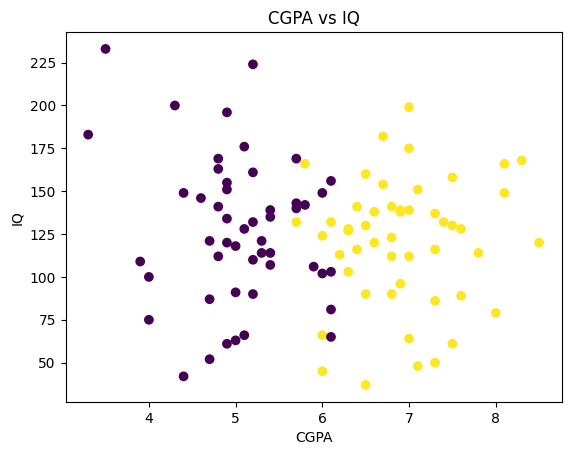

In [81]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('CGPA vs IQ')

In [82]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [85]:
X_train

,cgpa,iq
75,4.8,169.0
11,6.9,138.0
86,5.1,128.0
85,5.8,166.0
7,5.0,63.0
...,...,...
58,8.0,79.0
41,5.4,114.0
83,7.5,130.0
57,6.5,130.0


In [86]:
y_train

,placement
75,0
11,1
86,0
85,1
7,0
...,...
58,1
41,0
83,1
57,1


In [87]:
X_test

,cgpa,iq
47,5.2,161.0
28,5.2,90.0
30,7.6,128.0
9,5.1,66.0
73,4.9,61.0
56,6.1,65.0
43,6.8,141.0
22,4.9,120.0
60,6.9,139.0
91,7.5,158.0


In [88]:
y_test

,placement
47,0
28,0
30,1
9,0
73,0
56,0
43,1
22,0
60,1
91,1


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

In [91]:
X_train = scaler.fit_transform(X_train)

In [92]:
X_train

array([[-1.03427825,  1.11015089],
       [ 0.79433344,  0.33212502],
       [-0.77304801,  0.08114893],
       [-0.16351078,  1.03485806],
       [-0.86012476, -1.55019563],
       [ 1.8392544 ,  1.03485806],
       [ 0.88141018, -1.52509802],
       [ 0.44602645, -0.87256019],
       [-1.46966199,  1.88817675],
       [-1.121355  , -0.09453433],
       [ 0.44602645,  0.88427241],
       [-1.20843174,  0.53290589],
       [ 0.09771946,  0.18153937],
       [-0.86012476, -0.16982715],
       [ 2.18756139, -0.11963193],
       [-1.73089223, -0.62158411],
       [ 0.01064271, -0.57138889],
       [ 0.88141018,  1.86307915],
       [ 0.09771946, -0.54629128],
       [ 0.88141018,  0.35722263],
       [-1.38258524, -2.07724541],
       [ 0.5331032 ,  0.33212502],
       [ 1.14264042,  0.30702741],
       [-0.59889452, -0.27021759],
       [ 0.09771946, -1.09843867],
       [-2.16627596,  2.71639784],
       [-0.9472015 ,  1.78778632],
       [ 0.70725669, -0.3204128 ],
       [-1.81796897,

In [93]:
X_test = scaler.transform(X_test)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
clf = LogisticRegression()

In [96]:
clf.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_pred = clf.predict(X_test)

In [98]:
y_test

,placement
47,0
28,0
30,1
9,0
73,0
56,0
43,1
22,0
60,1
91,1


In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test, y_pred)

0.9

In [101]:
from mlxtend.plotting import plot_decision_regions

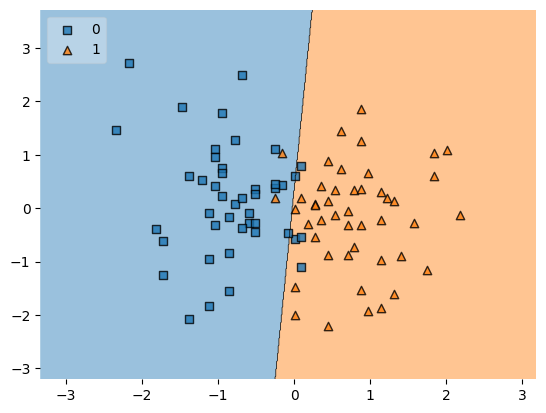

In [104]:
 fig = plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [106]:
import pickle

In [107]:
pickle.dump(clf, open('model.pkl', 'wb'))